### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [2]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Seria_A_match_details/'
file_list = os.listdir(path)

Premier_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Premier_matches = pd.concat([Premier_matches, pd.read_json(filepath, lines=True)], axis=0)

In [3]:
Premier_matches.tail(5)

,match_general_info,team_details,event_details
790,"{'day': 'Sat', 'date': '9/22/12', 'starttime':...","{'home': {'name': 'Parma FC', 'rank': '12', 's...","{'home': {'goal': [{'scorer': 'Jaime Valdés', ..."
791,"{'day': 'Sat', 'date': '9/22/12', 'starttime':...","{'home': {'name': 'Juventus FC', 'rank': '1', ...",{'home': {'goal': [{'scorer': 'Fabio Quagliare...
792,"{'day': 'Sun', 'date': '9/23/12', 'starttime':...","{'home': {'name': 'UC Sampdoria', 'rank': '4',...","{'home': {'goal': [{'scorer': 'Nicola Pozzi', ..."
793,"{'day': 'Sun', 'date': '9/23/12', 'starttime':...","{'home': {'name': 'Atalanta BC', 'rank': '9', ...",{'home': {'goal': [{'scorer': 'Cristian Raimon...
794,"{'day': 'Sun', 'date': '9/23/12', 'starttime':...","{'home': {'name': 'Bologna FC 1909', 'rank': '...",{'home': {'goal': [{'scorer': 'Alberto Gilardi...


In [4]:
print('number of matches from season 2010/2011 to the date the data scraped:', len(Premier_matches))

number of matches from season 2010/2011 to the date the data scraped: 4980


### Match general information analysis
#### Observe initial form

In [5]:
match_general_info = pd.DataFrame(Premier_matches['match_general_info'].to_list())

In [6]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Fri,2/9/18,8:45 PM,Artemio Franchi,32.563,Marco Guida,0:2
1,Sat,2/10/18,3:00 PM,Paolo Mazza,13.100,Maurizio Mariani,0:4
2,Sat,2/10/18,6:00 PM,Ezio Scida,8.795,Davide Massa,1:1
3,Sat,2/10/18,8:45 PM,Stadio Diego Armando Maradona,32.940,Luca Banti,4:1
4,Sun,2/11/18,12:30 PM,Mapei Stadium - Città del Tricolore,8.319,Paolo Silvio Mazzoleni,0:0


In [7]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 0
stadium 0
attendance 499
referee 0
score 0


Attendance data need to be observed after converting string-type date to date-type date to check why many null values exist.

#### Data pre-processing

In [8]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [9]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Fri,2018-02-09,20:45:00,Artemio Franchi,32.563,Marco Guida,0:2,0,2
1,Sat,2018-02-10,15:00:00,Paolo Mazza,13.100,Maurizio Mariani,0:4,0,4
2,Sat,2018-02-10,18:00:00,Ezio Scida,8.795,Davide Massa,1:1,1,1
3,Sat,2018-02-10,20:45:00,Stadio Diego Armando Maradona,32.940,Luca Banti,4:1,4,1
4,Sun,2018-02-11,12:30:00,Mapei Stadium - Città del Tricolore,8.319,Paolo Silvio Mazzoleni,0:0,0,0


In [10]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
165,Sun,2018-08-26,20:30:00,Stadio Olimpico Grande Torino,None,Gianluca Manganiello,0:0,0,0
342,Sat,2019-01-19,20:30:00,Giuseppe Meazza,None,Luca Pairetto,0:0,0,0
776,Sat,2020-06-20,19:30:00,Stadio Olimpico Grande Torino,None,Massimiliano Irrati,1:1,1,1
777,Sat,2020-06-20,21:45:00,Marcantonio Bentegodi,None,Gianluca Manganiello,2:1,2,1
778,Sun,2020-06-21,19:30:00,Gewiss Stadium,None,Daniele Chiffi,4:1,4,1
...,...,...,...,...,...,...,...,...,...
1289,Sun,2021-05-23,20:45:00,Stadio Diego Armando Maradona,None,Daniele Chiffi,1:1,1,1
2085,Sun,2012-09-23,15:00:00,Stadio Is Arenas,None,Antonio Giannoccaro,0:3,0,3
4920,Wed,2012-05-02,20:45:00,Mario Rigamonti,None,Paolo Silvio Mazzoleni,2:1,2,1
4942,Sun,2012-05-13,20:45:00,Luigi Ferraris,None,Paolo Valeri,2:0,2,0


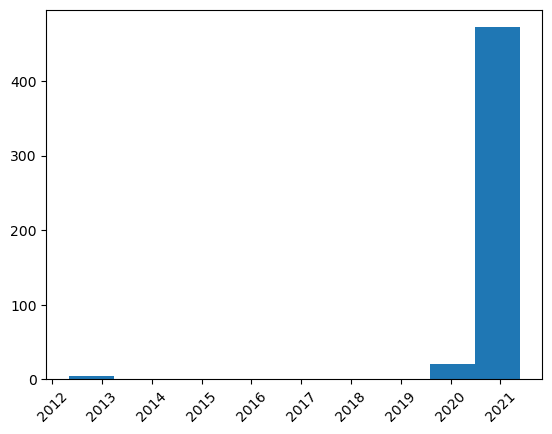

In [11]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most null cases for attendance were located in the season 2020-2021, possibly because of the pandemic. <br>
There were many games without game spectators during the pandemic(between 05.01.2020 and 07.01.2021), so 0 will replace null values for attendance. <br>

For other cases, the average attendance for the stadium will replace null values.

In [12]:
match_general_info.loc[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01'), 'attendance'] = \
    match_general_info[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01')]['attendance'].fillna('0')

print('Date and stadium of a game with null attendance. (Not pandemic season)')
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

Date and stadium of a game with null attendance. (Not pandemic season)


,date,stadium
165,2018-08-26,Stadio Olimpico Grande Torino
342,2019-01-19,Giuseppe Meazza
784,2020-03-08,Ennio Tardini
785,2020-03-08,Giuseppe Meazza
786,2020-03-08,Luigi Ferraris
787,2020-03-08,Dacia Arena
788,2020-03-08,Allianz Stadium
789,2020-03-09,Mapei Stadium - Città del Tricolore
2085,2012-09-23,Stadio Is Arenas
4920,2012-05-02,Mario Rigamonti


In [13]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        print('cannot find an average, missing value filled out manually:', stadium)
        # max capacity of Kenilworth Road stadium is 11500, so I am going to use 10000.(because nothing left after drop null value)
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(10000)) 

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

In [14]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2018-08-26 15547
2019-01-19 44951
2020-03-08 11705
2020-03-08 44951
2020-03-08 17987
2020-03-08 15047
2020-03-08 33246
2020-03-09 10424
2012-09-23 7516
2012-05-02 9655
2012-05-13 17987
2012-09-02 10445


As we can see above, missing attendance of matches after 07.01.2021 (no pandemic period) were filled with averages.

In [15]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 0
score 0
home_score 0
away_score 0


Now, we don't have null values anymore.

#### Data Quality Check - Check if there are inappropriate values
##### categorical data

In [16]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,4980,4980,4980,4980,4980
unique,7,27,39,97,49
top,Sun,15:00:00,Giuseppe Meazza,Daniele Orsato,1:1
freq,2755,1812,497,218,579


In [17]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,4980
mean,2017-01-26 22:49:09.397590016
min,2010-08-28 00:00:00
25%,2013-11-01 12:00:00
50%,2017-01-22 00:00:00
75%,2020-07-08 00:00:00
max,2023-09-03 00:00:00


In [18]:
match_general_info['day'].value_counts(dropna=False)

Sun    2755
Sat    1173
Wed     455
Mon     278
Fri     136
Tue     104
Thu      79
Name: day, dtype: int64

In [19]:
match_general_info['date'].value_counts(dropna=False)

2012-09-23    11
2021-01-06    10
2018-03-31    10
2011-01-09    10
2014-04-19    10
              ..
2014-04-02     1
2015-05-25     1
2022-02-28     1
2022-03-04     1
2017-04-29     1
Name: date, Length: 1357, dtype: int64

In [20]:
match_general_info['starttime'].value_counts(dropna=False)

15:00:00    1812
20:45:00    1520
18:00:00     675
12:30:00     372
18:30:00     159
20:30:00     123
21:00:00      99
19:00:00      55
19:30:00      54
21:45:00      50
17:15:00      11
16:30:00      10
14:30:00       8
17:00:00       6
18:45:00       6
15:15:00       4
20:00:00       3
20:15:00       2
15:30:00       2
00:00:00       2
18:55:00       1
13:45:00       1
17:45:00       1
12:45:00       1
18:15:00       1
12:50:00       1
16:00:00       1
Name: starttime, dtype: int64

In [21]:
match_general_info['stadium'].value_counts(dropna=False)

Giuseppe Meazza                         497
Olimpico di Roma                        497
Luigi Ferraris                          457
Marcantonio Bentegodi                   324
Artemio Franchi                         287
Stadio Diego Armando Maradona           250
Dacia Arena                             249
Stadio Renato Dall’Ara                  232
Allianz Stadium                         230
Gewiss Stadium                          226
Stadio Olimpico Grande Torino           212
Mapei Stadium - Città del Tricolore     195
Ennio Tardini                           156
Carlo Castellani                        116
Comunale Renzo Barbera "La Favorita"    114
Unipol Domus                             96
Sant'Elia                                90
Ettore Giardiniero                       78
Cibali - Angelo Massimino                76
Orogel Stadium - Dino Manuzzi            58
Paolo Mazza                              57
Alberto Picco                            56
Ezio Scida                      

In [22]:
match_general_info['referee'].value_counts(dropna=False)

Daniele Orsato             218
Daniele Doveri             210
Paolo Valeri               201
Davide Massa               190
Marco Guida                181
                          ... 
Daniel Amabile               1
Gianpiero Miele              1
Angelo Martino Giancola      1
Gennaro Palazzino            1
Silvio Baratta               1
Name: referee, Length: 97, dtype: int64

##### numerical data


In [23]:
match_general_info.describe()

,attendance,home_score,away_score
count,4980.000000,4980.000000,4980.000000
mean,21259.158635,1.513855,1.218273
std,15799.383399,1.259791,1.143081
min,0.000000,0.000000,0.000000
25%,10779.500000,1.000000,0.000000
50%,18122.500000,1.000000,1.000000
75%,29131.500000,2.000000,2.000000
max,80074.000000,8.000000,7.000000


### Home/Away Team Details Analysis

#### Data pre-processing

In [24]:
team_details = pd.DataFrame(Premier_matches['team_details'].to_list())
home_team_details = pd.DataFrame(team_details['home'].to_list())
away_team_details = pd.DataFrame(team_details['away'].to_list())

In [25]:
home_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,ACF Fiorentina,11,"[Marco Sportiello, Davide Astori, Germán Pezze...","[Michele Cerofolini, Bartlomiej Dragowski, Vit...",Stefano Pioli
1,SPAL 2013,18,"[Alex Meret, Felipe, Lorenco Simic, Bartosz Sa...","[Alfred Gomis, Gabriele Marchegiani, Sauli Väi...",Leonardo Semplici
2,FC Crotone,17,"[Alex Cordaz, Marco Capuano, Federico Ceccheri...","[Marco Festa, Aniello Viscovo, Daniel Pavlovic...",Walter Zenga
3,SSC Napoli,1,"[Pepe Reina, Kalidou Koulibaly, Lorenzo Tonell...","[Luigi Sepe, Rafael Cabral, Raúl Albiol, Chris...",Maurizio Sarri
4,US Sassuolo,15,"[Andrea Consigli, Francesco Acerbi, Edoardo Go...","[Gianluca Pegolo, Mauricio Lemos, Rogério, Cri...",Giuseppe Iachini


In [26]:
away_team_details.head()

,name,rank,starting_line_up,substitutes,manager
0,Juventus FC,2,"[Gianluigi Buffon, Giorgio Chiellini, Medhi Be...","[Carlo Pinsoglio, Wojciech Szczesny, Andrea Ba...",Massimiliano Allegri
1,AC Milan,7,"[Gianluigi Donnarumma, Alessio Romagnoli, Leon...","[Alessandro Guarnone, Antonio Donnarumma, Gust...",Gennaro Gattuso
2,Atalanta BC,8,"[Etrit Berisha, José Luis Palomino, Rafael Tol...","[Francesco Rossi, Pierluigi Gollini, Alessandr...",Gian Piero Gasperini
3,SS Lazio,5,"[Thomas Strakosha, Stefan de Vrij, Wallace, St...","[Guido Guerrieri, Ivan Vargic, Patric, Bastos,...",Simone Inzaghi
4,Cagliari Calcio,14,"[Alessio Cragno, Leandro Castán, Luca Ceppitel...","[Rafael, Luca Crosta, Senna Miangue, Filippo R...",Diego López


In [27]:
for column in home_team_details.columns:

    print('home', column, home_team_details[column].isnull().sum())

for column in away_team_details.columns:

    print('away', column, away_team_details[column].isnull().sum())


home name 0
home rank 0
home starting_line_up 6
home substitutes 6
home manager 6
away name 0
away rank 0
away starting_line_up 6
away substitutes 6
away manager 6


6 cases of missing data will not have significant effect on statistics, therefore those will be left as None.

In [28]:
concat_team_details = pd.concat([home_team_details, away_team_details], axis=0)

In [29]:
concat_team_details = concat_team_details.reset_index()

#### Team name, rank and manager analysis

In [30]:
concat_team_details[['name', 'rank', 'manager']].describe()

,name,rank,manager
count,9960,9960,9948
unique,43,20,123
top,ACF Fiorentina,11,Stefano Pioli
freq,499,499,437


In [31]:
concat_team_details['name'].value_counts()

ACF Fiorentina          499
Juventus FC             499
SS Lazio                498
SSC Napoli              498
AC Milan                498
Udinese Calcio          497
AS Roma                 497
Atalanta BC             461
Bologna FC 1909         460
Genoa CFC               459
UC Sampdoria            457
Torino FC               422
Cagliari Calcio         422
US Sassuolo             384
Inter Milan             345
Chievo Verona           343
Hellas Verona           307
US Palermo              229
Parma FC                191
US Lecce                155
Empoli FC               152
FC Internazionale       152
Calcio Catania          152
FC Crotone              115
Spezia Calcio           114
AC Cesena               114
Parma Calcio 1913       114
FC Empoli                79
US Salernitana 1919      79
Frosinone Calcio         79
Delfino Pescara 1936     77
Brescia Calcio           76
SPAL                     76
AC Siena                 76
Benevento Calcio         76
AC Monza            

In [32]:
team_rank_list = []
for team_name in set(concat_team_details['name'].values):
    
    team_rank_list.append(pd.concat([pd.Series({'name':team_name}), pd.to_numeric(concat_team_details[concat_team_details['name']==team_name]['rank']).describe()]))

team_rank_list_df = pd.DataFrame(team_rank_list)

In [33]:
team_rank_list_df.sort_values(by='mean')

,name,count,mean,std,min,25%,50%,75%,max
37,SSC Napoli,498.0,3.429719,2.450328,1.0,2.00,3.0,4.00,14.0
11,Juventus FC,499.0,3.472946,3.942454,1.0,1.00,2.0,5.00,20.0
18,Inter Milan,345.0,4.315942,3.219924,1.0,2.00,3.0,6.00,19.0
25,FC Internazionale,152.0,4.973684,2.686605,1.0,3.00,5.0,6.00,16.0
12,AS Roma,497.0,4.989940,2.773343,1.0,3.00,5.0,6.00,19.0
21,AC Milan,498.0,5.487952,3.613196,1.0,2.00,5.0,7.75,19.0
19,SS Lazio,498.0,5.656627,2.868087,1.0,4.00,5.0,7.00,19.0
20,Atalanta BC,461.0,9.008677,4.516146,1.0,5.00,8.0,13.00,20.0
42,ACF Fiorentina,499.0,9.062124,3.995247,1.0,6.00,9.0,12.00,20.0
23,Torino FC,422.0,10.765403,3.362422,2.0,9.00,10.0,13.00,20.0


In [34]:
concat_team_details['manager'].value_counts()

Stefano Pioli           437
Gian Piero Gasperini    412
Massimiliano Allegri    402
Siniša Mihajlović       326
Rolando Maran           277
                       ... 
Luca Vigiani              1
Giovanni Bosi             1
Fabrizio Lorieri          1
Abdoulay Konko            1
Attilio Perotti           1
Name: manager, Length: 123, dtype: int64

In [35]:
manager_rank_list = []
for manager_name in set(concat_team_details['manager'].values):
    
    manager_rank_list.append(pd.concat([pd.Series({'manager':manager_name}), pd.to_numeric(concat_team_details[concat_team_details['manager']==manager_name]['rank']).describe()]))

manager_rank_list_df = pd.DataFrame(manager_rank_list)

In [36]:
manager_rank_list_df.sort_values(by='mean').head(30)

,manager,count,mean,std,min,25%,50%,75%,max
74,Angelo Alessio,8.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
111,Massimo Carrera,8.0,1.375000,1.060660,1.0,1.00,1.0,1.00,4.0
46,Antonio Conte,175.0,1.902857,1.472640,1.0,1.00,1.0,2.00,12.0
5,Rudi Garcia,98.0,2.500000,1.541522,1.0,2.00,2.0,2.00,10.0
0,Leonardo,23.0,2.739130,1.053884,2.0,2.00,2.0,3.00,6.0
96,Luciano Spalletti,209.0,2.837321,2.182171,1.0,2.00,3.0,3.00,17.0
38,Carlo Ancelotti,53.0,3.169811,1.888588,2.0,2.00,2.0,4.00,9.0
64,Andrea Pirlo,38.0,3.710526,0.956002,2.0,3.00,3.0,4.75,6.0
54,Rafael Benítez,91.0,3.824176,2.173545,1.0,3.00,3.0,4.00,14.0
122,Massimiliano Allegri,402.0,4.283582,4.570771,1.0,1.00,2.0,6.00,20.0


####  Home/Away starting lineup analysis

In [37]:
concat_team_details['starting_line_up'].describe()

count                                                  9948
unique                                                 9212
top       [Pepe Reina, Kalidou Koulibaly, Raúl Albiol, F...
freq                                                     18
Name: starting_line_up, dtype: object

In [39]:
players_start_lineup = []
for line_up in concat_team_details['starting_line_up']:

    if line_up != None:

        for player in line_up:

            players_start_lineup.append(player)

players_start_lineup_df = pd.DataFrame({'player_name': players_start_lineup})       

In [40]:
len(players_start_lineup_df)

109429

In [41]:
players_start_lineup_df.describe()

,player_name
count,109429
unique,2162
top,Samir Handanovic
freq,453


In [42]:
players_start_lineup_df.value_counts().head(60)

player_name            
Samir Handanovic           453
Danilo                     451
Andrea Consigli            431
Antonio Candreva           371
Leonardo Bonucci           367
Francesco Acerbi           338
Radja Nainggolan           334
Marco Parolo               319
Lorenzo De Silvestri       308
Papu Gómez                 292
Ciro Immobile              292
Giacomo Bonaventura        290
Juan Cuadrado              290
Fabio Quagliarella         287
Antonio Mirante            284
Stefan Radu                284
Stefano Sorrentino         283
Lorenzo Insigne            279
Domenico Berardi           278
Marek Hamsik               274
Giorgio Chiellini          271
Ivan Radovanovic           270
Rodrigo Palacio            265
Alessio Romagnoli          264
Perparim Hetemaj           261
Mattia Perin               256
Tomás Rincón               254
Josip Ilicic               253
Gianluigi Buffon           253
Senad Lulic                252
José Callejón              252
Cristiano Birag

### Match events analysis - substitution, cards, goal(assists)

#### subsitution (in/out)

In [43]:
event_type = []
for i in range(100):
    keys = list(Premier_matches['event_details'].iloc[i]['home'].keys())
    
    for j in keys:
        event_type.append(j)


print("Categories of events:")
set(event_type)



Categories of events:


{'card', 'goal', 'sub'}

In [44]:
home_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            home_subs_list.append(one_sub)


away_subs_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'sub' in list(i.keys()):
        
        for one_sub in i['sub']:

            away_subs_list.append(one_sub)

concat_subs_df = pd.concat([pd.DataFrame(home_subs_list), pd.DataFrame(away_subs_list)]).reset_index()

In [45]:
# null values of subs_in could be nobody replace subs out player. 
# (red card or injured but no more subs chances?)
for column in concat_subs_df.columns:
    print(column, concat_subs_df[column].isnull().sum())

index 0
subs_in 22
subs_out 0
subs_out_reason 0
time 0


In [46]:
concat_subs_df[['subs_in', 'subs_out', 'subs_out_reason']].describe()

,subs_in,subs_out,subs_out_reason
count,32989,33011,33011
unique,2356,1933,9
top,Luis Muriel,Antonio Candreva,Tactical
freq,129,167,13920


In [47]:
concat_subs_df['time'].describe()

count    33011.000000
mean        68.749356
std         14.887817
min          2.000000
25%         61.000000
50%         71.000000
75%         80.000000
max         95.000000
Name: time, dtype: float64

In [48]:
concat_subs_df['subs_in'].value_counts().head(50)

Luis Muriel              129
Goran Pandev             128
Dries Mertens            113
Piotr Zielinski          108
Alessandro Matri         106
Manolo Gabbiadini        104
Grégoire Defrel          102
Mattia Destro            101
Sergio Floccari          100
Giampaolo Pazzini         99
Keita Baldé               95
Stephan El Shaarawy       94
Eljif Elmas               93
Nicola Sansone            91
Maxi López                91
Alfred Duncan             90
Fabio Quagliarella        90
Sergio Pellissier         90
Federico Bernardeschi     90
Riccardo Meggiorini       90
Matteo Politano           88
Josip Ilicic              87
Andrea Poli               86
Alberto Paloschi          86
Kevin Lasagna             85
Marco D'Alessandro        80
Danilo Cataldi            79
Khouma Babacar            79
Simone Verdi              77
Simone Zaza               76
Diego Farias              75
Federico Bonazzoli        75
Riccardo Saponara         75
Afriyie Acquah            74
Éder          

In [49]:
concat_subs_df['subs_out'].value_counts().head(50)

Antonio Candreva       167
Josip Ilicic           157
Marek Hamsik           146
Papu Gómez             145
Lorenzo Insigne        141
Giacomo Bonaventura    133
Fabio Quagliarella     131
Luis Muriel            131
Matteo Politano        127
Piotr Zielinski        125
Domenico Berardi       124
Valter Birsa           123
Paulo Dybala           122
Goran Pandev           115
Gianluca Caprari       114
Mattia Destro          113
Duván Zapata           109
Andrea Poli            109
Dries Mertens          104
Manolo Gabbiadini      104
José Callejón          103
Cyril Théréau          103
Simone Verdi           102
Juan Cuadrado          101
Lorenzo Pellegrini     100
Hakan Calhanoglu        99
Miralem Pjanic          97
Daniele Baselli         97
Stephan El Shaarawy     96
Marco Sau               96
Filip Djuricic          95
Albin Ekdal             95
Riccardo Meggiorini     93
Grégoire Defrel         93
Gastón Ramírez          92
Alberto Paloschi        92
Alfred Duncan           92
M

#### Card

In [50]:
home_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            home_cards_list.append(one_cards)


away_cards_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'card' in list(i.keys()):
        
        for one_cards in i['card']:

            away_cards_list.append(one_cards)

concat_cards_df = pd.concat([pd.DataFrame(home_cards_list), pd.DataFrame(away_cards_list)]).reset_index()

In [51]:
# null value of reasons -> reason not specified.
for column in concat_cards_df.columns:
    print(column, concat_cards_df[column].isnull().sum())

index 0
name 0
card_type 0
reason 11755
time 0


In [52]:
concat_cards_df[['name', 'card_type', 'reason']].describe()

,name,card_type,reason
count,23762,23762,12007
unique,1898,4,17
top,Danilo,Yellow card,Foul
freq,107,22119,9430


In [53]:
concat_cards_df['time'].describe()

count    23762.000000
mean        56.632523
std         24.723714
min          1.000000
25%         37.000000
50%         59.000000
75%         79.000000
max         96.000000
Name: time, dtype: float64

In [54]:
concat_cards_df['name'].value_counts().head(50)

Danilo                     107
Luca Cigarini               95
Juan Cuadrado               92
Perparim Hetemaj            87
Radja Nainggolan            84
Luca Rigoni                 84
Marco Parolo                83
Tomás Rincón                81
Bostjan Cesar               81
Domenico Berardi            81
Federico Peluso             78
Leonardo Bonucci            76
Felipe                      76
Ivan Radovanovic            76
Marcelo Brozovic            74
Senad Lulic                 72
Miralem Pjanic              72
Juraj Kucka                 70
Albin Ekdal                 69
Daniele De Rossi            69
Nicolò Barella              69
Stefan Radu                 68
Luca Rossettini             67
Kalidou Koulibaly           66
Daniele Conti               65
Marten de Roon              65
Alessio Romagnoli           65
Davide Astori               63
Blerim Dzemaili             62
Giampiero Pinzi             62
Nicolás Burdisso            61
Daniele Gastaldello         61
Gianluca

In [55]:
# 1 Yellow card -> Yellow card
concat_cards_df['card_type'].value_counts()

Yellow card      22119
Second yellow      654
1 Yellow card      538
Red card           451
Name: card_type, dtype: int64

#### Goal (assist)

In [56]:
home_goals_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['home']).to_list():

    if 'goal' in list(i.keys()):
        
        for one_goals in i['goal']:

            home_goals_list.append(one_goals)


away_goals_list = []
for i in Premier_matches['event_details'].apply(lambda x: x['away']).to_list():

    if 'goal' in list(i.keys()):
        
        for one_goals in i['goal']:

            away_goals_list.append(one_goals)

concat_goals_df = pd.concat([pd.DataFrame(home_goals_list), pd.DataFrame(away_goals_list)]).reset_index()

In [57]:
concat_goals_df.head()

,index,scorer,goal_type,assister,assist_type,time
0,0,Rolando Mandragora,Tap-in,None,None,80
1,1,José Callejón,Right-footed shot,Jorginho,Pass,44
2,2,Wallace,Own-goal,None,None,54
3,3,Mário Rui,Long distance kick,José Callejón,Pass,56
4,4,Dries Mertens,Right-footed shot,Piotr Zielinski,Pass,73


In [58]:
print(len(concat_goals_df), len(concat_goals_df.drop_duplicates()))

13600 13600


In [59]:
# null value of assisters: solo goal
# null value of assist type: solo goal
for column in concat_goals_df.columns:
    print(column, concat_goals_df[column].isnull().sum())

index 0
scorer 0
goal_type 0
assister 3284
assist_type 3284
time 0


Null values of assister and assis_type are from solo goal.

In [60]:
concat_goals_df[['scorer', 'goal_type', 'assister', 'assist_type']].describe()

,scorer,goal_type,assister,assist_type
count,13600,13600,10316,10316
unique,1394,35,1367,12
top,Ciro Immobile,Right-footed shot,Domenico Berardi,Pass
freq,195,4510,92,5017


In [61]:
concat_goals_df[['time']].describe()

,time
count,13600.000000
mean,50.651397
std,26.394478
min,1.000000
25%,29.000000
50%,52.000000
75%,73.000000
max,96.000000


##### scorer

In [62]:
concat_goals_df[(concat_goals_df['goal_type']=='Own-goal')]['scorer'].value_counts()
own_goal_df = concat_goals_df[(concat_goals_df['goal_type']=='Own-goal')]['scorer'].value_counts().reset_index()

own_goal_df.columns = ['scorer', 'num_own_goal']

In [63]:
own_goal_df

,scorer,num_own_goal
0,Wallace,5
1,Francesco Vicari,4
2,Vangelis Moras,4
3,Milan Skriniar,4
4,Luca Ceppitelli,4
...,...,...
288,Marco Borriello,1
289,Gabriele Angella,1
290,Andrea Ranocchia,1
291,Perparim Hetemaj,1


In [64]:
# record here could be wrong because it include also own goal.
# also updatad record is not added
concat_goals_df['scorer'].value_counts().head(50)
total_goal_df = concat_goals_df['scorer'].value_counts().reset_index()

total_goal_df.columns = ['scorer', 'num_goals']

In [65]:
total_goal_df

,scorer,num_goals
0,Ciro Immobile,195
1,Fabio Quagliarella,132
2,Gonzalo Higuaín,126
3,Mauro Icardi,122
4,Domenico Berardi,115
...,...,...
1389,Bruno Martella,1
1390,Bartosz Salamon,1
1391,Ricardo Rodríguez,1
1392,Andrea Cistana,1


In [66]:
# merge own goal and total goal dataframe to calculata net goal (total goal - own goal)
net_goal_df = own_goal_df.merge(total_goal_df, on='scorer', how='outer')

net_goal_df.sort_values(by="num_goals", ascending=0).head()

,scorer,num_own_goal,num_goals
293,Ciro Immobile,NaN,195
294,Fabio Quagliarella,NaN,132
295,Gonzalo Higuaín,NaN,126
279,Mauro Icardi,1.0,122
296,Domenico Berardi,NaN,115


In [67]:
net_goal_df = net_goal_df.fillna(0)

In [68]:
net_goal_df['net_goal']  = net_goal_df['num_goals'] - net_goal_df['num_own_goal']

In [69]:
net_goal_df.sort_values(by="num_goals", ascending=0).head(30)

,scorer,num_own_goal,num_goals,net_goal
293,Ciro Immobile,0.0,195,195.0
294,Fabio Quagliarella,0.0,132,132.0
295,Gonzalo Higuaín,0.0,126,126.0
279,Mauro Icardi,1.0,122,121.0
296,Domenico Berardi,0.0,115,115.0
297,Dries Mertens,0.0,114,114.0
298,Paulo Dybala,0.0,110,110.0
299,Duván Zapata,0.0,109,109.0
238,Andrea Belotti,1.0,109,108.0
300,Edin Dzeko,0.0,107,107.0


In [70]:
# If there is {}goal of season in goal type -> goal type doe not specified.
concat_goals_df['goal_type'].value_counts()

Right-footed shot         4510
Left-footed shot          2677
Header                    2004
Penalty                   1330
Tap-in                     819
Long distance kick         504
Own-goal                   391
Direct free kick           369
Counter attack goal        227
Solo run                   154
Deflected shot on goal     153
1. Goal of the Season      101
2. Goal of the Season       80
4. Goal of the Season       47
3. Goal of the Season       45
Penalty rebound             41
5. Goal of the Season       38
Chest                       19
6. Goal of the Season       16
7. Goal of the Season       12
8. Goal of the Season        8
Direct corner                7
9. Goal of the Season        7
11. Goal of the Season       7
14. Goal of the Season       6
12. Goal of the Season       6
13. Goal of the Season       5
16. Goal of the Season       4
10. Goal of the Season       4
15. Goal of the Season       3
20. Goal of the Season       2
24. Goal of the Season       1
26. Goal

In [71]:
def replace_non_specified_goal_type(sample):

    if len(sample.split('. '))>1 and sample.split('. ')[1] == 'Goal of the Season':
        sample = None

    return sample

In [72]:
concat_goals_df['goal_type'] = concat_goals_df['goal_type'].apply(lambda x: replace_non_specified_goal_type(x))

In [73]:
concat_goals_df['goal_type'].value_counts()

Right-footed shot         4510
Left-footed shot          2677
Header                    2004
Penalty                   1330
Tap-in                     819
Long distance kick         504
Own-goal                   391
Direct free kick           369
Counter attack goal        227
Solo run                   154
Deflected shot on goal     153
Penalty rebound             41
Chest                       19
Direct corner                7
Name: goal_type, dtype: int64

In [74]:
concat_goals_df['goal_type'].isnull().sum()

395